# Hola Juan!

Mi nombre es David Bautista, soy code reviewer de Tripleten y hoy tengo el gusto de revisar tu proyecto.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - por favor, no los muevas, no los modifiques ni los borres.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

# Descripción del Proyecto

Proyecto de analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. El cual busca encontrar patrones en la información disponible. Para así comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.
Teniendo como fin analizar los datos de los competidores y comprobar una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hola, Juan, buen trabajo con una descripción del proyecto.⁣ </div>

## Preparación de los datos

In [1]:
# Cargo todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo importando las librerías necesarias para el desarrollo del proyecto.  </div>

In [2]:
# Cargo el archivo de datos en un DataFrame

company= pd.read_csv('/datasets/project_sql_result_01.csv')
travel= pd.read_csv('/datasets/project_sql_result_04.csv')
travel_loop= pd.read_csv('/datasets/project_sql_result_07.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo cargando los datos necesarios para el desarrollo del proyecto.  </div>

A continuación, se visualizan los datos para una comprensión inicial y se hacen las correcciones pertinentes.

In [3]:
display(company.head())

company.info()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
display(travel.head())

travel.info()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [5]:
display(travel_loop.head())

travel_loop.info()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


**Cambio el tipo de datos acorde con la descripción de cada columna**

In [6]:
# Convertir la columna 'start_ts' al formato de fecha
travel_loop['start_ts'] = pd.to_datetime(travel_loop['start_ts'], format='%Y-%m-%d')  

In [7]:
travel_loop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


**Resumen preparación de los datos**

Se revisan nuevamente las bases de datos obtenidas y se hacen las correcciones necesarias para trabajar con ellas en Python, por ejemplo se corrige el tipo de datos de algunas columnas, al no encontrar ningún valor nulo no es necesario hacer modificaciones a ninguna de las bases de datos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo con el desarrollo de esta sección de exploración / modificación inicial de los dataframes.  </div>

## Analisis de los datos

### Top 10 de barrios con finalización de viajes 

In [8]:
# Organizar los barrios de mayor a menor en cuanto a finalización y tomar los diez primeros

df_organizado = travel.sort_values('average_trips', ascending=False)

top_10_barrios = df_organizado.head(10)

display(top_10_barrios)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### Top 10 de las empresas de taxis con mas viajes

In [9]:
# Organizar las compañias de mayor a menor en cuanto al promedio de viajes y tomar los diez primeros

company_organizado = company.sort_values('trips_amount', ascending=False)

top_10_company = company_organizado.head(10)

display(top_10_company)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


### Graficos

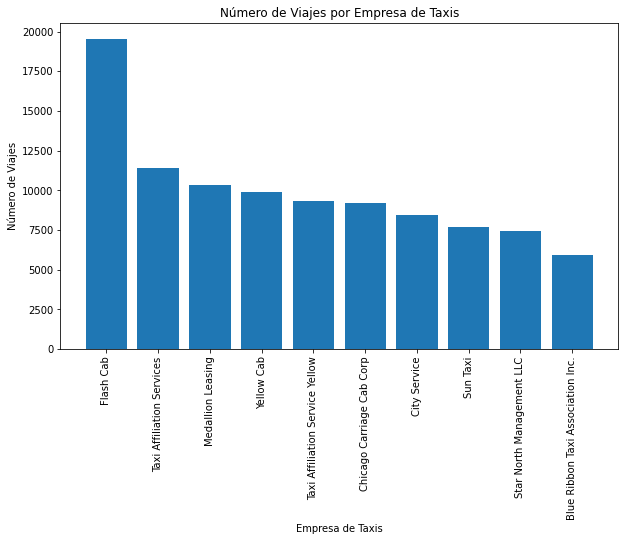

In [10]:
#grafico Número de Viajes por Empresa de Taxis

plt.figure(figsize=(10, 6))
plt.bar(top_10_company['company_name'], top_10_company['trips_amount'])
plt.xlabel('Empresa de Taxis') 
plt.ylabel('Número de Viajes') 
plt.title('Número de Viajes por Empresa de Taxis')
plt.xticks(rotation=90) 
plt.show()

Vemos que la empresa preferida por los usuarios es Flash Cab, la cual supera ampliamente a las demás compañías.

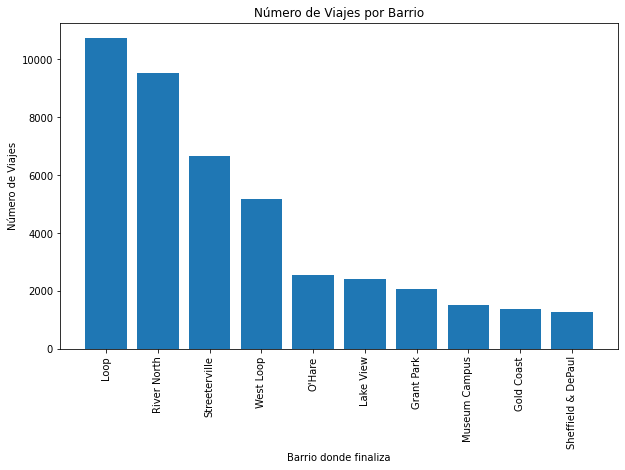

In [11]:
# Gráfico del número de viajes por barrio

plt.figure(figsize=(10, 6))
plt.bar(top_10_barrios['dropoff_location_name'], top_10_barrios['average_trips'])
plt.xlabel('Barrio donde finaliza') 
plt.ylabel('Número de Viajes') 
plt.title('Número de Viajes por Barrio')
plt.xticks(rotation=90) 
plt.show()

El barrio donde más finalizan los viajes es Loop, seguido por River North y Streeterville.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, Juan, buen trabajo estructurando tanto las tablas como los gráficos de la sección para mostrar el top de 10 de empresas con más viajes y el top 10 de números de viajes por barrio. Fantástico! </div>

## Hipótesis

### Varianza

In [12]:
# Calcular la varianza para el total de viajes
varianza = travel_loop['duration_seconds'].var()
display('La varianza de la duración de todos los viajes en segundos es:', varianza)

'La varianza de la duración de los viajes en segundos es:'

592070.4235009075

In [16]:
# Se dividen los viajes en grupos segun sus condiciones
viajes_buenos = travel_loop[travel_loop['weather_conditions'] == 'Good']
viajes_malos = travel_loop[travel_loop['weather_conditions'] == 'Bad']

In [17]:
# Calcular la varianza para los viajes con buenas condiciones
varianza_buenos = viajes_buenos['duration_seconds'].var()

# Calcular la varianza para los viajes lluviosos
varianza_malos = viajes_malos['duration_seconds'].var()

display('Varianza de los viajes con condiciones buenas:', varianza_buenos)
display('Varianza de los viajes con condiciones de lluvia:', varianza_malos)

'Varianza de los viajes con condiciones buenas:'

576382.009689509

'Varianza de los viajes con condiciones malas:'

520294.086002483

### Hipótesis nula 

**H0:**La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es la misma los sábados lluviosos.

### hipótesis alternativa

**H1:**La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

### Prueba de hipótesis

In [15]:
# filtrar los datos para sábados lluviosos y sábados con condiciones climáticas buenas

sabados_lluviosos = travel_loop[travel_loop['weather_conditions'] == 'Bad']  # Filtra los sábados lluviosos

sabados_buenos = travel_loop[travel_loop['weather_conditions'] == 'Good']  # Filtra los sábados con condiciones buenas

# Calcula la duración promedio de los viajes para sábados lluviosos y sábados con condiciones climáticas buenas
duracion_promedio_lluvia = sabados_lluviosos['duration_seconds'].mean()
duracion_promedio_buen_tiempo = sabados_buenos['duration_seconds'].mean()

# Realiza un test estadístico para comparar las duraciones promedio
test_estadistico, valor_p = st.ttest_ind(sabados_lluviosos['duration_seconds'], sabados_buenos['duration_seconds'])

# Compara el valor p con un nivel de significancia elegido (por ejemplo, 0.05) para determinar si hay una diferencia significativa

nivel_significancia = 0.05
if valor_p < nivel_significancia:
    print("Hay una diferencia significativa en la duración promedio de los viajes entre sábados lluviosos y sábados buenos.")
else:
    print("No hay evidencia suficiente para afirmar que la duración promedio de los viajes difiere entre sábados lluviosos y sábados buenos.")

Hay una diferencia significativa en la duración promedio de los viajes entre sábados lluviosos y sábados buenos.


Partiendo de los resultados anteriores rechazamos la hipótesis nula y aceptamos la hipótesis que: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

~~Muy buen trabajo estableciendo y desarrollando la prueba de hipótesis. Mi única observación es que sería interesante realizar un pequeño estudio de las varianzas de los grupos creados, teniendo en cuenta que es un fundamento teórico importante en la prueba.~~  </div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Muchas gracias por tu comentario, agrego el cálculo de la varianza general para los viajes y para los viajes en buenas y malas condiciones.</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Gracias por tener en cuenta mi comentario Juan, muy buen trabajo.  </div>

## Conclusión general


Luego del análisis hecho a las bases de datos obtenidas podemos concluir que:

la empresa preferida por los usuarios es Flash Cab, la cual supera ampliamente a las demás compañías; el barrio donde más finalizan los viajes es Loop, seguido por River North y Streeterville. Y que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo con las conclusiones generadas.  </div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

# Comentario General 
    
~~Hola, Juan, te felicito por lo desarrollado hasta el momento. Ahora bien, he dejado un comentario en amarillo para que lo puedas tener en cuenta.~~  </div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Muchas gracias por el comentario, hago las correcciones necesarias.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

# Comentario General #2
    
Hola, Juan, te felicito por la culminación del proyecto. Realizaste un muy buen trabajo. </div>